In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df = pd.read_csv('diabetes.csv')
print("Initial Data Preview:")
print(df.head())


Initial Data Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Columns where 0 is invalid and should be treated as missing
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Fill NaNs with median
df.fillna(df.median(), inplace=True)

# Check if missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


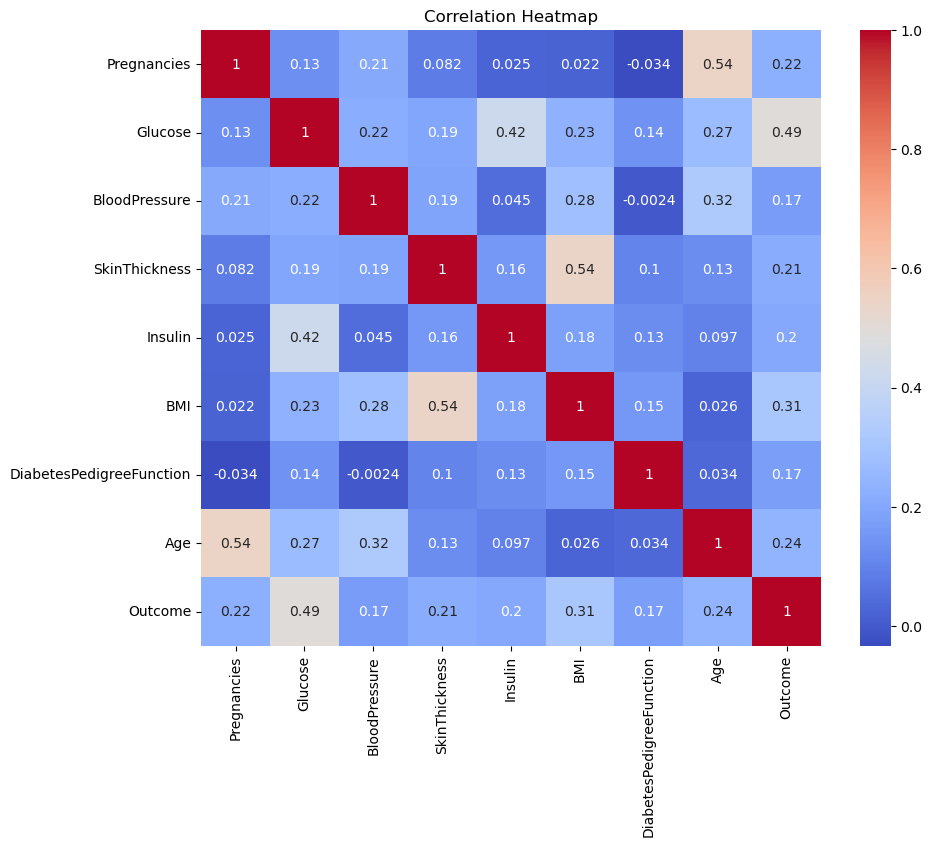

In [6]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




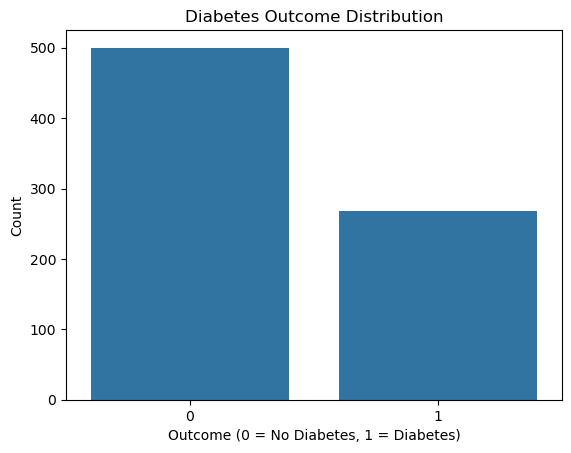

In [7]:
# 2. Outcome Distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()



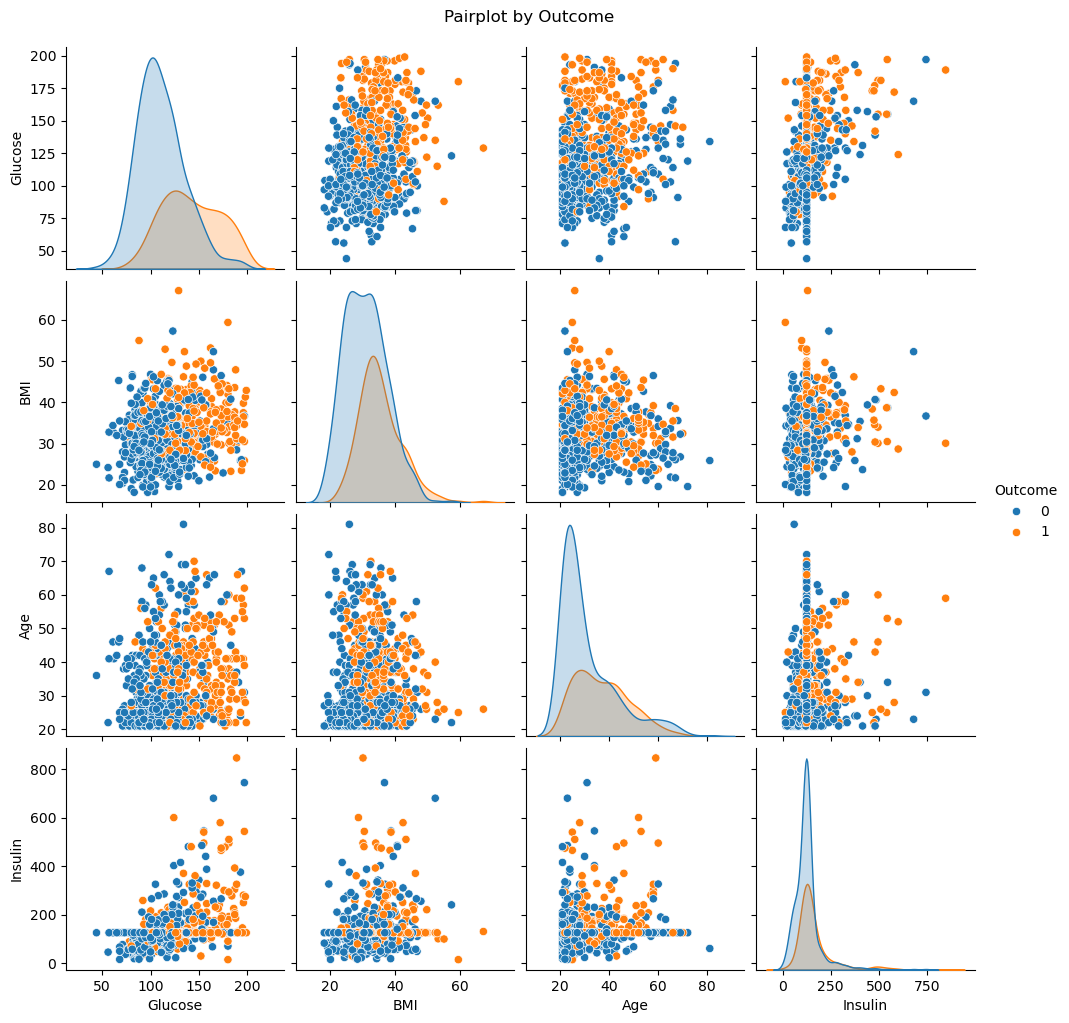

In [8]:
# 3. Pairplot
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome')
plt.suptitle("Pairplot by Outcome", y=1.02)
plt.show()




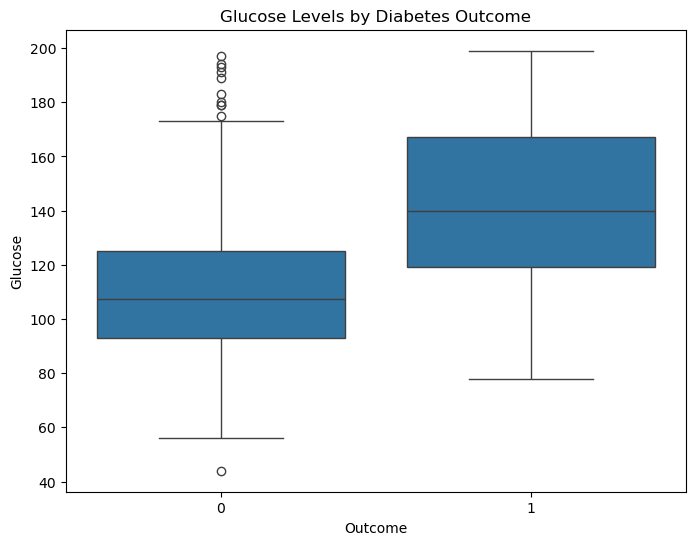

In [9]:
# 4. Boxplot: Glucose vs Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()


In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Random Forest
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[79 20]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


SVM
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[83 16]
 [23 32]]
Classification Report:
               precision    recal

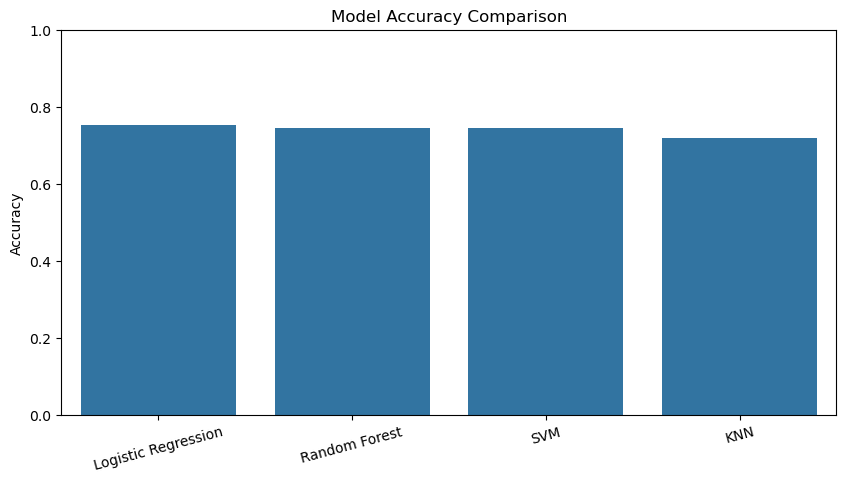

In [15]:
# 5. Accuracy Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()


In [16]:
# Re-train best model (Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [19]:


# Sample input (8 features: Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age)
sample_input = np.array([[2, 120, 70, 20, 85, 32.0, 0.47, 25]])

# Scale input
scaled_input = scaler.transform(sample_input)

# Predict
prediction = model.predict(scaled_input)
probability = model.predict_proba(scaled_input)

# Output result
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")
print("Probability:", probability)


Prediction: Not Diabetic
Probability: [[0.94 0.06]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
sample_input = np.array([[1, 99, 62, 15, 80, 28.0, 0.35, 22]])
scaled_input = scaler.transform(sample_input)
prediction = model.predict(scaled_input)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Not Diabetic


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
sample_input = np.array([[5, 150, 85, 35, 150, 33.5, 0.65, 45]])
scaled_input = scaler.transform(sample_input)
prediction = model.predict(scaled_input)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Diabetic


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
sample_input = np.array([[3, 126, 70, 25, 90, 30.0, 0.50, 30]])
scaled_input = scaler.transform(sample_input)
prediction = model.predict(scaled_input)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Not Diabetic


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
sample_input = np.array([[10, 180, 100, 35, 200, 40.0, 1.0, 55]])
scaled_input = scaler.transform(sample_input)
prediction = model.predict(scaled_input)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Diabetic


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
scaled_input = scaler.transform(sample_input)
prediction = model.predict(scaled_input)
print("Prediction:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Prediction: Diabetic


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
import pickle

# Save the trained model
with open("diabetes_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Model and scaler saved as 'diabetes_model.pkl' and 'scaler.pkl'")


✅ Model and scaler saved as 'diabetes_model.pkl' and 'scaler.pkl'
